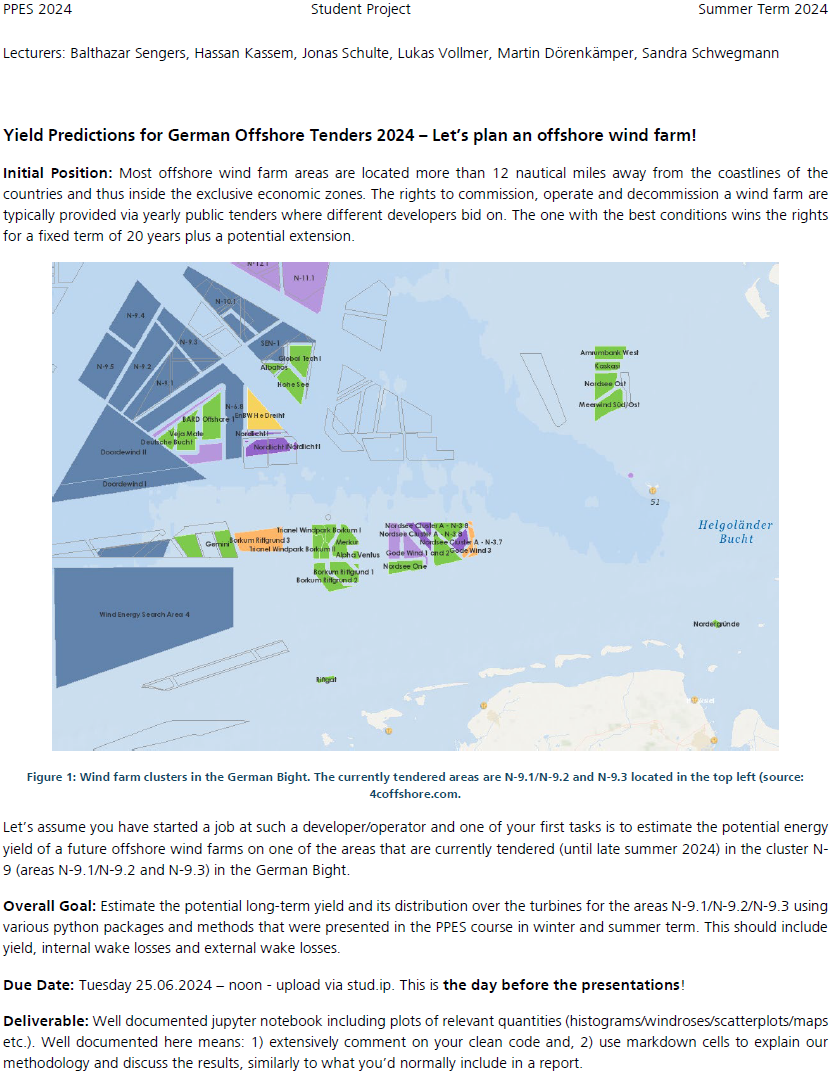

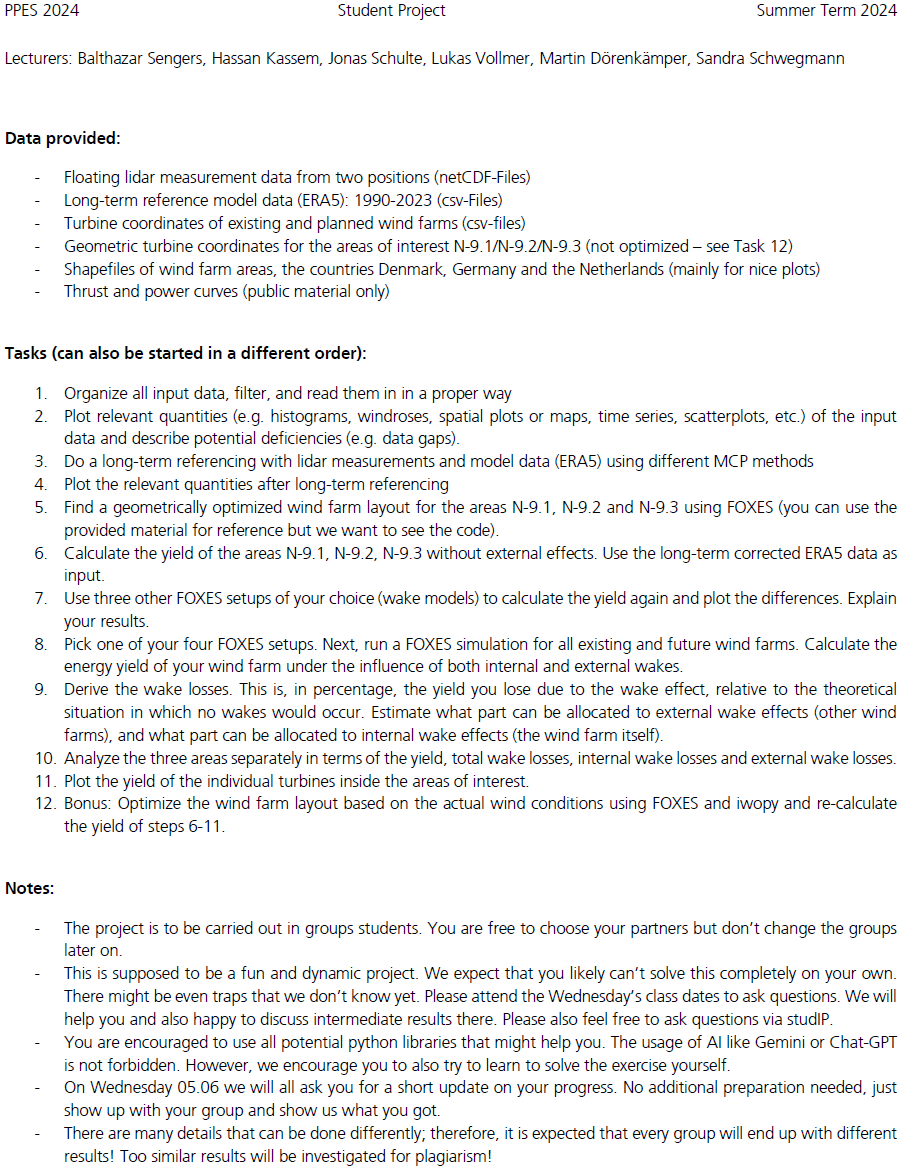

## Nedeed Imports

In [47]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import foxes
import foxes.variables as FV
import foxes.constants as FC
import netCDF4 as nc
from scipy import stats

1. Organize all input data, filter, and read them in in a proper way

In [2]:
# Load netCDF files for (LiDAR) Floating lidar measurement data from two positions (netCDF-Files)
lidar_data_1 = nc.Dataset('measurements/2023-11-06_Buoy6_BSH_N-9.nc')
lidar_data_2 = nc.Dataset('measurements/2023-11-09_Buoy2_BSH_N-9.nc')


# wind_farm_shapes = gpd.read_file('wind_farm_shapes.shp')

In [3]:
lidar_data_1

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    long_name: Data measured by the sensors mounted on the Fraunhofer IWES WLBZ_6
    description: BSH N-9 Fraunhofer IWES WLBZ_6 data from the period 2022-03-03 00:00:00 UTC to 2023-04-04 04:30:00 UTC.
    disclaimer: The use of the data is in the sole responsibility of the user.
    dimensions(sizes): time(57196), longitude(1), latitude(1), height(6)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), float64 time(time), int32 height(height)
    groups: ZX_LIDAR_WLBZ_6, METEO_WLBZ_6, ADD_DATA_WLBZ_6, ZX_LIDAR_WLBZ_2_MCP, METEO_WLBZ_2_MCP

In [4]:
lidar_data_1.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     description: Longitude of the conducted measurements
     units: Degrees east
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     description: Latitude of the conducted measurements
     units: Degrees north
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     units: hours since 1900-01-01 00:00:00.0
     description: 2022-03-03 00:00:00 UTC to 2023-04-04 04:30:00 UTC
 unlimited dimensions: 
 current shape = (57196,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'height': <class 'netCDF4._netCDF4.Variable'>
 int32 height(height)
     units: m above MSL
     description: Measurement height of Lidar ZX1051 in metres above MSL.

In [5]:
print(lidar_data_1.groups)

{'ZX_LIDAR_WLBZ_6': <class 'netCDF4._netCDF4.Group'>
group /ZX_LIDAR_WLBZ_6:
    long_name: Wind data measured by ZX1051 on WLBZ_6
    description: The data are availability, count and algorithm flagged. Timestamp indicating the beginning of the aggregation period.
    dimensions(sizes): 
    variables(dimensions): float64 wind_speed(time, latitude, longitude, height), float64 wind_from_direction(time, latitude, longitude, height), float64 wind_from_direction_availability(time, latitude, longitude, height), float64 wind_speed_availability(time, latitude, longitude, height), float64 wind_speed_min(time, latitude, longitude, height), float64 wind_speed_max(time, latitude, longitude, height), float64 wind_speed_stddev(time, latitude, longitude, height), float64 wind_count(time, latitude, longitude, height), float64 turbulence_intensity(time, latitude, longitude, height), float64 algorithm_bitmask(time, latitude, longitude, height)
    groups: , 'METEO_WLBZ_6': <class 'netCDF4._netCDF4.Gro

In [6]:
lidar_data_2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    long_name: Data measured by the sensors mounted on the Fraunhofer IWES WLBZ_2
    description: BSH N-9 Fraunhofer IWES WLBZ_2 data from the period 2022-03-03 00:00:00 UTC to 2023-06-15 23:50:00 UTC.
    disclaimer: The use of the data is in the sole responsibility of the user.
    dimensions(sizes): time(67680), longitude(1), latitude(1), height(6)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), float64 time(time), int32 height(height)
    groups: ZX_LIDAR_WLBZ_2, METEO_WLBZ_2, ADD_DATA_WLBZ_2, ZX_LIDAR_WLBZ_6_MCP, METEO_WLBZ_6_MCP

In [55]:
lidar_data_2.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     description: Longitude of the conducted measurements
     units: Degrees east
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     description: Latitude of the conducted measurements
     units: Degrees north
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     units: hours since 1900-01-01 00:00:00.0
     description: 2022-03-03 00:00:00 UTC to 2023-06-15 23:50:00 UTC
 unlimited dimensions: 
 current shape = (67680,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'height': <class 'netCDF4._netCDF4.Variable'>
 int32 height(height)
     units: m above MSL
     description: Measurement height of Lidar ZX961/ZX740 in metres above

In [56]:
print(lidar_data_2.groups)

{'ZX_LIDAR_WLBZ_2': <class 'netCDF4._netCDF4.Group'>
group /ZX_LIDAR_WLBZ_2:
    long_name: Wind data measured by ZX961/ZX740 on WLBZ_2
    description: The data are availability, count and algorithm flagged. Timestamp indicating the beginning of the aggregation period.
    dimensions(sizes): 
    variables(dimensions): float64 wind_speed(time, latitude, longitude, height), float64 wind_from_direction(time, latitude, longitude, height), float64 wind_from_direction_availability(time, latitude, longitude, height), float64 wind_speed_availability(time, latitude, longitude, height), float64 wind_speed_min(time, latitude, longitude, height), float64 wind_speed_max(time, latitude, longitude, height), float64 wind_speed_stddev(time, latitude, longitude, height), float64 wind_count(time, latitude, longitude, height), float64 turbulence_intensity(time, latitude, longitude, height), float64 algorithm_bitmask(time, latitude, longitude, height)
    groups: , 'METEO_WLBZ_2': <class 'netCDF4._netCDF

In [60]:
lidar_data_2['ZX_LIDAR_WLBZ_2']['wind_speed']
# print the values inside the shape
print(lidar_data_2['ZX_LIDAR_WLBZ_2']['wind_speed'])

<class 'netCDF4._netCDF4.Variable'>
float64 wind_speed(time, latitude, longitude, height)
    units: m/s
    long_name: Wind speed
path = /ZX_LIDAR_WLBZ_2
unlimited dimensions: 
current shape = (67680, 1, 1, 6)
filling on, default _FillValue of 9.969209968386869e+36 used


In [61]:
print(lidar_data_2['ZX_LIDAR_WLBZ_2']['wind_speed'][:])
test = lidar_data_2['ZX_LIDAR_WLBZ_2']['wind_speed'][:]
print(test.shape)

# save test as a pandas dataframe
test_df = pd.DataFrame(test.reshape(-1, test.shape[-1])) 

[[[[nan nan nan nan nan nan]]]


 [[[nan nan nan nan nan nan]]]


 [[[nan nan nan nan nan nan]]]


 ...


 [[[nan nan nan nan nan nan]]]


 [[[nan nan nan nan nan nan]]]


 [[[nan nan nan nan nan nan]]]]
(67680, 1, 1, 6)


In [12]:
# Load csv files for Long-term reference model data (ERA5): 1990-2023 (csv-Files)
listEra = []
filelist = glob.glob(f'reanalysis/ERA5*')
for i in filelist:
    listEra.append(pd.read_csv(i,encoding='utf-8',header=0,parse_dates=['Time [UTC]']))  # header 0 because the first row is the header, encoding='utf-8' because the file is in utf-8 format, parse_dates=['Time [UTC]'] because the time column is in datetime format
era5_data = pd.concat(listEra) # Concatenate all the files into one dataframe

# wind speed calculations
era5_data['ws100'] = np.sqrt(era5_data['u100']**2 + era5_data['v100']**2)
era5_data['ws10'] = np.sqrt(era5_data['u10']**2 + era5_data['v10']**2)


In [13]:
# Geometric turbine coordinates for the areas of interest N-9.1/N-9.2/N-9.3
area_n91 = pd.read_csv('turbine-info/coordinates/area_of_interest/layout-N-9.1.geom.csv')
area_n92 = pd.read_csv('turbine-info/coordinates/area_of_interest/layout-N-9.2.geom.csv')
area_n93 = pd.read_csv('turbine-info/coordinates/area_of_interest/layout-N-9.3.geom.csv')


In [14]:
# Turbine coordinates of existing and planned wind farms (csv-files) do we need them?

In [15]:
# Power curves of the turbines
power_curve_IEA_15MW = pd.read_csv('turbine-info/power_curves/IEA-15MW-D240-H150.csv')
power_curve_NREL_5MW = pd.read_csv('turbine-info/power_curves/NREL-5MW-D126-H90.csv')

In [16]:
# Shapefiles of wind farm areas, the countries Denmark, Germany and the Netherlands (mainly for nice plots)

# shape files for DEU
deu = gpd.read_file('shapefiles/DEU/DEU_adm1.shp')
deu

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry
0,86,DEU,Germany,1,Baden-Württemberg,None,None,Land,State,"MULTIPOLYGON (((8.70837 47.71556, 8.70918 47.7..."
1,86,DEU,Germany,2,Bayern,None,Bavaria,Land,State,"POLYGON ((10.13386 50.55000, 10.13980 50.54252..."
2,86,DEU,Germany,3,Berlin,None,None,Land,State,"POLYGON ((13.16181 52.59442, 13.17400 52.59425..."
3,86,DEU,Germany,4,Brandenburg,None,None,Land,State,"POLYGON ((13.87951 53.50107, 13.87927 53.49908..."
4,86,DEU,Germany,5,Bremen,None,None,Land,State,"POLYGON ((8.98545 53.12822, 8.97316 53.12799, ..."
5,86,DEU,Germany,6,Hamburg,None,None,Land,State,"POLYGON ((10.07162 53.71823, 10.07150 53.72192..."
6,86,DEU,Germany,7,Hessen,None,Hesse,Land,State,"POLYGON ((9.49877 51.63152, 9.50474 51.62795, ..."
7,86,DEU,Germany,8,Mecklenburg-Vorpommern,None,Mecklenburg-West Pomerania,Land,State,"MULTIPOLYGON (((14.26472 53.71069, 14.26472 53..."
8,86,DEU,Germany,9,Niedersachsen,None,Lower Saxony,Land,State,"MULTIPOLYGON (((6.86528 53.59597, 6.86528 53.5..."
9,86,DEU,Germany,10,Nordrhein-Westfalen,None,North Rhine-Westphalia,Land,State,"POLYGON ((8.66628 52.52528, 8.67277 52.51795, ..."


In [17]:
# shape files for DNK
dnk = gpd.read_file('shapefiles/DNK/gadm36_DNK_1.shp')
dnk

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,DNK,Denmark,DNK.1_1,Hovedstaden,Capital,None,Region,Region,None,DK.HS,"MULTIPOLYGON (((14.91719 55.01903, 14.91695 55..."
1,DNK,Denmark,DNK.2_1,Midtjylland,Central Jutland,None,Region,Region,None,DK.MJ,"MULTIPOLYGON (((10.79305 55.93431, 10.79305 55..."
2,DNK,Denmark,DNK.3_1,Nordjylland,North Jutland,None,Region,Region,None,DK.ND,"MULTIPOLYGON (((10.27194 56.70625, 10.27194 56..."
3,DNK,Denmark,DNK.4_1,Sjælland,Zealand,None,Region,Region,None,DK.SL,"MULTIPOLYGON (((11.86361 54.72903, 11.86139 54..."
4,DNK,Denmark,DNK.5_1,Syddanmark,South Denmark,None,Region,Region,None,DK.SD,"MULTIPOLYGON (((10.71417 54.88097, 10.71417 54..."


In [18]:
# shape files for NLD
nld = gpd.read_file('shapefiles/NLD/gadm36_NLD_1.shp')
nld

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,NLD,Netherlands,NLD.1_1,Drenthe,None,None,Provincie,Province,None,NL.DR,"POLYGON ((7.02172 52.87205, 7.02427 52.87192, ..."
1,NLD,Netherlands,NLD.2_1,Flevoland,None,None,Provincie,Province,None,NL.FL,"MULTIPOLYGON (((5.62186 52.65091, 5.60696 52.6..."
2,NLD,Netherlands,NLD.3_1,Friesland,Frise|Frisia|Frísia,None,Provincie,Province,None,NL.FR,"MULTIPOLYGON (((5.07028 53.30708, 5.07028 53.3..."
3,NLD,Netherlands,NLD.4_1,Gelderland,Geldern|Gheldria|Guelders|Gueldre,None,Provincie,Province,None,NL.GE,"POLYGON ((6.47629 51.85640, 6.47579 51.85624, ..."
4,NLD,Netherlands,NLD.5_1,Groningen,Groninga|Groningue,None,Provincie,Province,None,NL.GR,"MULTIPOLYGON (((6.47417 53.55449, 6.47417 53.5..."
5,NLD,Netherlands,NLD.6_1,IJsselmeer,None,None,Water body,Water body,None,None,"POLYGON ((5.00024 52.34938, 4.99432 52.35205, ..."
6,NLD,Netherlands,NLD.7_1,Limburg,Limbourg|Limburgo,None,Provincie,Province,None,NL.LI,"POLYGON ((6.03670 50.72349, 6.03493 50.72393, ..."
7,NLD,Netherlands,NLD.8_1,Noord-Brabant,Brabante del Norte|Brabante do Norte|Brabante ...,None,Provincie,Province,None,NL.NB,"POLYGON ((4.27809 51.37864, 4.27582 51.38202, ..."
8,NLD,Netherlands,NLD.9_1,Noord-Holland,Holanda do Norte|Hollande-septentrionale|North...,None,Provincie,Province,None,NL.NH,"MULTIPOLYGON (((4.53305 52.46431, 4.53305 52.4..."
9,NLD,Netherlands,NLD.10_1,Overijssel,None,None,Provincie,Province,None,NL.OV,"POLYGON ((6.86698 52.12796, 6.86305 52.12517, ..."


2. Plot relevant quantities (e.g. histograms, windroses, spatial plots or maps, time series, scatterplots, etc.) of the input data and describe potential deficiencies (e.g. data gaps).

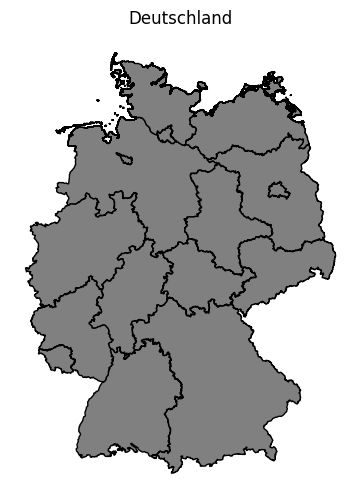

In [19]:
# DE - Germany Map Plot with Lambert Conformal Projection
proj1=ccrs.LambertConformal(central_longitude=10, central_latitude=51)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection=proj1)
deu.plot(ax=ax, legend=True, transform=ccrs.PlateCarree(),edgecolor='black', facecolor='grey',aspect=None)
ax.axis('off') # Switch off the Frame 
ax.set_title(f"Deutschland")

plt.show()

C:\Users\abdel\AppData\Local\Temp\ipykernel_30884\269387031.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nds_center= deu[deu["NAME_1"]=="Niedersachsen"].centroid


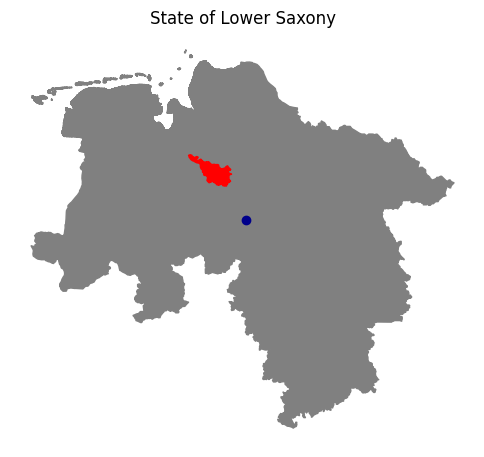

In [20]:
proj1=ccrs.LambertConformal(central_longitude=10, central_latitude=51)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection=proj1)
deu[deu["NAME_1"]=="Niedersachsen"].plot(ax=ax, legend=True, transform=ccrs.PlateCarree(),edgecolor='grey', facecolor='grey',aspect=None)
deu[deu["NAME_1"]=="Bremen"].plot(ax=ax, legend=True, transform=ccrs.PlateCarree(),edgecolor='red', facecolor='red',aspect=None)
nds_center= deu[deu["NAME_1"]=="Niedersachsen"].centroid
ax.scatter(nds_center.x,nds_center.y,transform=ccrs.PlateCarree(),color="darkblue") # Centerpoint of Lower Saxony
ax.axis('off') # Switch off the Frame 
ax.set_title(f"State of Lower Saxony")
plt.show()

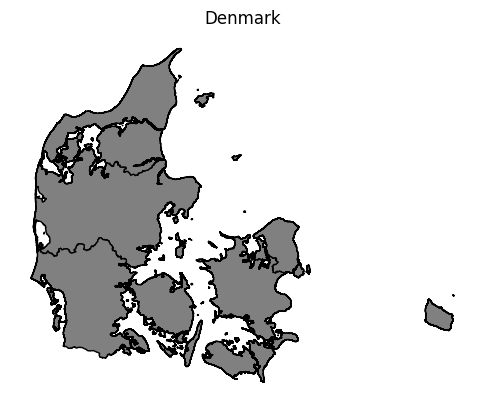

In [21]:
# DN - Denmark Map Plot with Lambert Conformal Projection
proj2=ccrs.LambertConformal(central_longitude=10, central_latitude=51)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection=proj2)
dnk.plot(ax=ax, legend=True, transform=ccrs.PlateCarree(),edgecolor='black', facecolor='grey',aspect=None)
ax.axis('off') # Switch off the Frame
ax.set_title(f"Denmark")

plt.show()

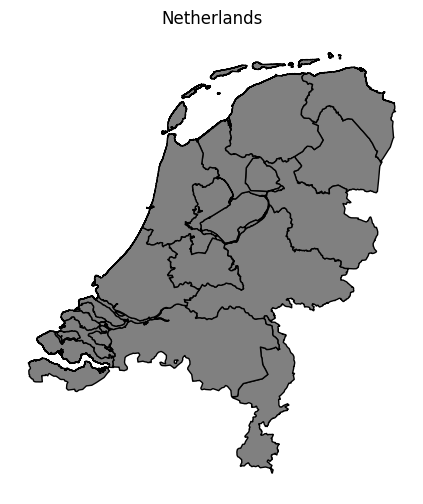

In [22]:
# NL - Netherlands Map Plot with Lambert Conformal Projection
proj3=ccrs.LambertConformal(central_longitude=10, central_latitude=51)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection=proj3)
nld.plot(ax=ax, legend=True, transform=ccrs.PlateCarree(),edgecolor='black', facecolor='grey',aspect=None)
ax.axis('off') # Switch off the Frame
ax.set_title(f"Netherlands")

plt.show()

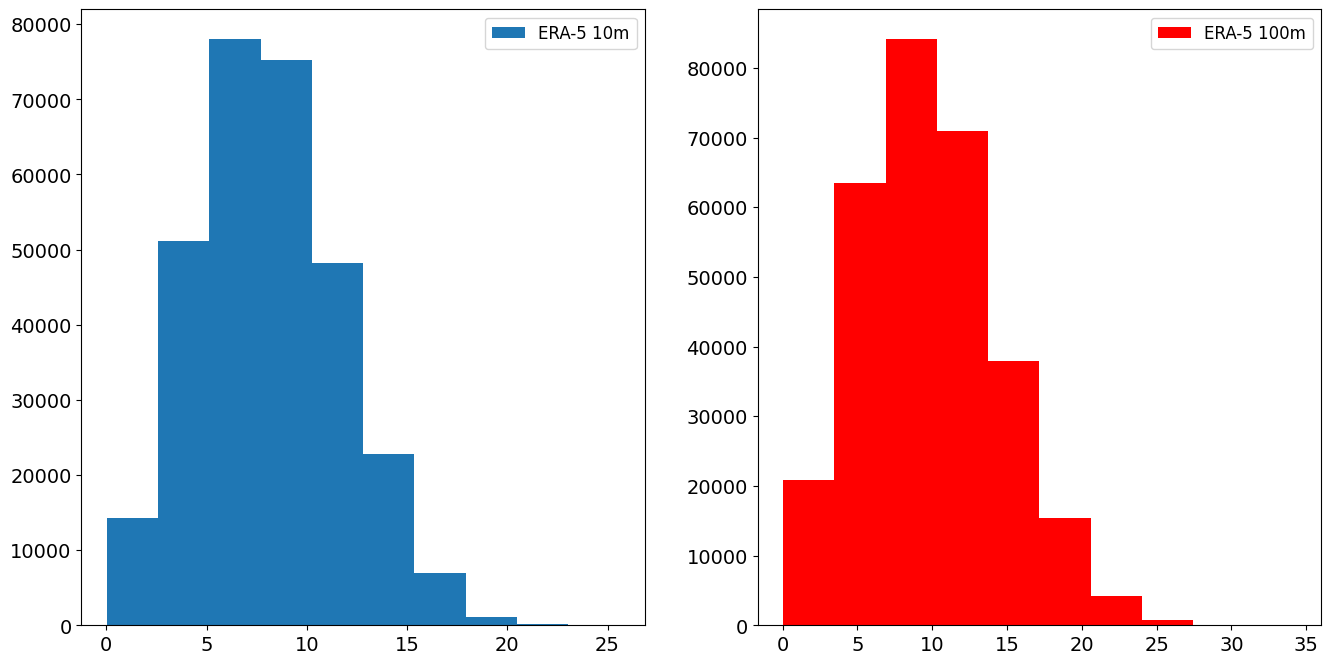

In [23]:
# Era5 Data Plot
fig = plt.figure(figsize=(16,8))
fig.add_subplot(121)
plt.hist(era5_data['ws10'],label='ERA-5 10m')
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.legend(fontsize= 12)

fig.add_subplot(122)
plt.hist(era5_data['ws100'],label='ERA-5 100m',color='red')
#plt.xlabel('Sea ice extent',fontsize= 14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.legend(fontsize= 12)


In [24]:
# describe potential deficiencies (e.g. data gaps)


In [25]:
# plots of power curves of the turbines


3. Do a long-term referencing with lidar measurements and model data (ERA5) using different MCP methods

In [49]:
# Do a long-term referencing with lidar measurements and model data (ERA5) using different MCP methods

# Perform long-term referencing using different MCP methods
methods = ['mean', 'median', 'mode', 'max', 'min']
referenced_data = {}

for method in methods:
    if method == 'mean':
        referenced_data[method] = era5_data.mean() - lidar_data_1.mean()
    elif method == 'median':
        referenced_data[method] = np.median(era5_data) - np.median(lidar_data_1)
    elif method == 'mode':
        referenced_data[method] = stats.mode(era5_data)[0][0] - stats.mode(lidar_data_1)[0][0]
    elif method == 'max':
        referenced_data[method] = era5_data.max() - lidar_data_1.max()
    elif method == 'min':
        referenced_data[method] = era5_data.min() - lidar_data_1.min()

# Plot the referenced data
fig, ax = plt.subplots()
for method, data in referenced_data.items():
    ax.plot(data, label=method)

ax.legend()
plt.show()

AttributeError: NetCDF: Attribute not found

In [26]:
# Example MCP method (simplified)
# def mcp(lidar_data, era5_data):
#     # Align data temporally
#     # lowest and highest date in lidar_data
#     lowest_date = lidar_data['time'].min().values.astype('datetime64[ns]')
#     highest_date = lidar_data['time'].max().values.astype('datetime64[ns]')
#     era5_new_data = era5_data.copy()
#     era5_new_data['Time [UTC]'] = pd.to_datetime(era5_new_data['Time [UTC]'])
#     aligned_data = era5_new_data[(era5_new_data['Time [UTC]'] >= lowest_date) & (era5_new_data['Time [UTC]'] <= highest_date)]
#     # Linear regression for MCP
#     slope, intercept = np.polyfit(aligned_data['ws100'], era5_new_data['ws100'], 1)
#     long_term_corrected = era5_new_data['ws100'] * slope + intercept
#     return long_term_corrected

# corrected_wind_speeds = mcp(lidar_data_1, era5_data)

In [27]:
# a) Preprocess the data by aligning the time and spatial coordinates between the lidar measurements and ERA5 data

